# Exploring Probability Simulations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')

In order to ensure your plots are inline, make sure to run the matplotlib magic command. 

# Simulating 2 die rolls

I'm interested in simulating the rolling of two dice to figure out
1. The average value of the sum of two dice.
2. The probability distribution of that sum.

In [4]:
for i in np.arange(1000):
    num_trials = 1000
    roll_1 = np.random.randint(1, 7, num_trials)
    roll_2 = np.random.randint(1, 7, num_trials)
    sum_rolls = roll_1 + roll_2
    mean_sums = np.mean(sum_rolls)

In [5]:
mean_sums

7.006

In [6]:
sum_rolls[:20]

array([ 6,  7,  7,  7, 11, 11,  8,  8,  3,  8,  7,  6,  7,  5,  5,  9, 11,
       10,  6,  3])

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Frequency Dist. of Various Values of the Sum')

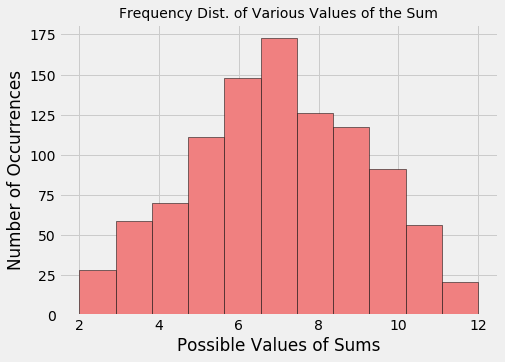

In [7]:
plt.figure(figsize = (7,5))
plt.style.use('fivethirtyeight')
n, bins, patches = plt.hist(sum_rolls, bins=len(np.unique(sum_rolls)), color = 'lightcoral', ec = 'black')
plt.xlabel('Possible Values of Sums')
plt.ylabel('Number of Occurrences')
plt.grid('on')         
plt.title('Frequency Dist. of Various Values of the Sum', size = 'medium')


## Finding the probability of a poker flush via simulation

### 5 card Poker 

I want to use simulations to figure out the probability of getting a flush in 5 card poker. I will do this by...

1. Creating an array that has all the ranks of the cards. For aces we will use 1, for jacks 11, for queens 12, and for kings 13. 
2. Creating an array that has the 4 suits - 'H', 'D', 'S', 'C'.
3. Creating a pandas dataframe that represents the entire deck using those 2 arrays
4. Sampling from that list repeatedly simulating a 5-card hand. 
5. Checking sample to see if all the cards have the same suit. If so, I'll count it as a flush.
6. Repeating the sampling process multiple times in order to estimate the required probability.



In [8]:
card_ranks = np.arange(1, 14)

In [9]:
suits = ['H', 'D', 'S', 'C']
card_suits = np.array(suits)


In [10]:
suits = np.array(list(card_suits[0]) * len(card_ranks) + list(card_suits[1]) * len(card_ranks) 
         + list(card_suits[2]) * len(card_ranks) + list(card_suits[3]) * len(card_ranks))
ranks = np.append(np.append(np.append(card_ranks, card_ranks), card_ranks), card_ranks)
card_deck = pd.DataFrame({"suits" : suits, "ranks" : ranks})
card_deck.sample(5, replace = True)

,suits,ranks
22,D,10
15,D,3
27,S,2
22,D,10
26,S,1


In [11]:
cards_draw = card_deck.sample(5, replace=True)
len(np.unique(cards_draw['suits']))

3

In [12]:
num_simulations = 50000
#create an empty list called winnings
num_flushes = 0
for i in np.arange(num_simulations):
    cards_draw = card_deck.sample(5, replace=True)
    if len(np.unique(cards_draw['suits'])) == 1:
        num_flushes = num_flushes + 1
print('The total number of flushes:')        
print(num_flushes)
print('The prob of a flush out of 50000 simulations:')
print(num_flushes / num_simulations)

The total number of flushes:
199
The prob of a flush out of 50000 simulations:
0.00398


### What about a full house?

I want to compute the probability of getting a full house (getting 3 cards of one kind and 2 other cards of a different kind).

In [13]:
vect_str = np.vectorize(str)
card_deck['ranks'] = vect_str(card_deck['ranks'])

In [14]:
num_simulations = 50000
#create an empty list called winnings
full_house_count = 0
for i in np.arange(num_simulations):
    cards_draw = card_deck.sample(5, replace=True)
    if len(np.unique(cards_draw['ranks'])) == 2:
        cards = np.array(cards_draw['ranks'])
        card_1 = np.unique(cards)[0] #first card type
        card_2 = np.unique(cards)[1] #second card type
        two_of_card_1 = (list(cards).count(np.unique(cards)[0]) == 2) #boolean to check if there are 2 of card_1
        two_of_card_2 = (list(cards).count(np.unique(cards)[1]) == 2) #boolean to check if there are 2 of card_2

        # if there are 2 of the same card (either card_1 or card_2), it must be a full house.
        if np.logical_or(two_of_card_1, two_of_card_2) == True:
            full_house_count = full_house_count + 1
print('The total number of full houses:')
print(full_house_count)
print('The prob of a full house out of 50000 simulations:')
print(full_house_count / num_simulations)

The total number of full houses:
212
The prob of a full house out of 50000 simulations:
0.00424


## Simulating the famous derangement/hat check problem.

Here's the premise:

- A group of 20 people enter a restaurant and check their hats. 

- The hat-checker is absent minded, and upon leaving, they redistribute the hats back to the patrons at random.

- I want to know how many people got their hats back. Since this is a random process, each time this experiment is conducted, we could have anywhere from 0 to 20 people getting their hats back. 

- I want to simulate the experiment and get a distribution for the number of people who get their hats back.


#### Step 1 - Helper functions

Writing a function called **arrange_hats** that takes in the number of patrons as an argument and then returns n samples (without replacement) as an array.

For example,if n is 5 and the function returns the array [1, 3, 4, 5 ,2] this means person 1 gets hat 1 (their own hat), person 2 gets hat 3 and so on

In [15]:
def arrange_hats(num_patrons):
    num_patrons = np.arange(1, num_patrons + 1)
    return np.random.choice(num_patrons, len(num_patrons), replace=False)

In [16]:
arrange_hats(20)

array([ 2,  7, 19, 11, 18,  5, 13, 16,  1,  4, 14, 20,  8,  9, 15,  6, 17,
        3, 12, 10])

Write a function called **num_happy_patrons** that figures out the number of patrons who got the correct hat back. The input to this function should be an array which has a random ordering of numbers from 1 to n and the output should be the number of places in the array where the ith element has the value i.

In [17]:
def num_happy_patrons(random_hats):
    count_event = 0
    for x in random_hats:
        if x == random_hats[x - 1]: #weird x - 1 is because of indexing
            count_event += 1
    return(count_event)

In [18]:
num_happy_patrons(arrange_hats(20))

0

#### Step 2 - Simulation 

Run the experiment 1000 times. Each time, I'll use my functions to figure out the number of patrons who got their hats back and store it in a dataframe. Then I'll plot the distribution (histogram) of the number of patrons who got their hats back.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of the number of patrons \n who got their hats back')

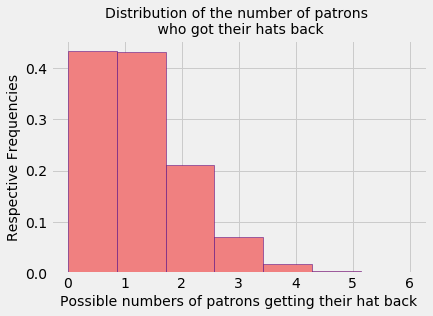

In [20]:
num_patrons = 20
iters = 10000
happy_patrons_count = []
for i in np.arange(iters):
    random_hats = arrange_hats(num_patrons)
    happy_patrons = num_happy_patrons(random_hats)
    happy_patrons_count.append(happy_patrons)
hat_check = pd.DataFrame({'Trial Number' : np.arange(1, iters + 1), 'Number of Happy Patrons' : happy_patrons_count})
hat_check.head(10)
n, bins, patches = plt.hist(hat_check['Number of Happy Patrons'], normed=True, bins = len(np.unique(happy_patrons_count)),
                           color = 'lightcoral', ec = 'indigo')
plt.xlabel('Possible numbers of patrons getting their hat back', size = 'medium')
plt.ylabel('Respective Frequencies', size = 'medium')
plt.title('Distribution of the number of patrons \n who got their hats back', size = 'medium')

- According to the histogram, the average number of people who get their hats back is 1.

#### Does this depend on the number of patrons?

Re-running this experiment with 30 patrons. 

Does your distribution change dramatically? Do fewer people get their hats back?

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of the number of patrons \n who got their hats back')

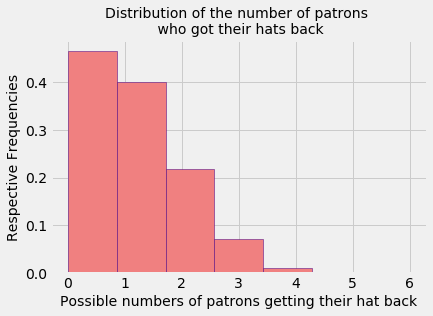

In [21]:
num_patrons = 30
iters = 1000
happy_patrons_count = []
for i in np.arange(iters):
    random_hats = arrange_hats(num_patrons)
    happy_patrons = num_happy_patrons(random_hats)
    happy_patrons_count.append(happy_patrons)
hat_check = pd.DataFrame({'Trial Number' : np.arange(1, iters + 1), 'Number of Happy Patrons' : happy_patrons_count})
hat_check.head(10)
n, bins, patches = plt.hist(hat_check['Number of Happy Patrons'], normed=True, bins = len(np.unique(happy_patrons_count)),
                           color = 'lightcoral', ec = 'indigo')
plt.xlabel('Possible numbers of patrons getting their hat back', size = 'medium')
plt.ylabel('Respective Frequencies', size = 'medium')
plt.title('Distribution of the number of patrons \n who got their hats back', size = 'medium')

In [22]:
np.mean(hat_check['Number of Happy Patrons'])

0.951

- No, the distribution does not change dramatically.

# Estimating War Planes

Here is the setup: The British Royal Air Force (RAF) want to know how many warplanes the Germans have.  They hypothesize that the Germans label their planes with serial numbers, starting from 1 for the first plane, and increasing by 1 for each new plane built.  That means that the number of planes the Germans have is equal to the largest serial number among their planes.  Let's call that number 'N'.

The RAF make the further assumption that each time the Germans send a plane into combat, they send one of their planes chosen uniformly at random, and an RAF observer always reports its serial number.  (That's not really true, and it's not exactly what the RAF assumed, but it makes the math simpler for this example.)  

Some planes might be observed several times, or not at all.  So if the Germans have 5 planes and send planes into combat 3 times, the RAF might observe the serial numbers 4, 1, and 4. Given a bunch of these random observations of serial numbers, the RAF want to estimate 'N'.We're going to simulate that sampling process and try out a few methods for estimating 'N'.  Then we'll check how well each method typically does at estimating 'N'.

Suppose that `N` is actually 150 (though the RAF don't know that) and we observe serial numbers 14 times.

### Part 1

Writing a function called **'simulate_observations'** to simulate that by making an array of 14 random serial numbers from 1 to 150. The function should take no arguments and return the random array it generates.

Next: setting a variable called observations to be the result of one call to simulate_observations.

In [23]:
def simulate_observations():
    random_nums = np.random.randint(1, 151, 14)
    return random_nums

In [24]:
observations = simulate_observations()

In [25]:
observations

array([140,  74,  23, 114,  83, 114,  69,  53,  66,  79,  78,  54,  59,
        85])

### Part 2

A straightforward way to estimate the biggest serial number is to find the biggest serial number among the serial numbers we managed to observe.  Use that method to estimate `N` from `observations`.

In [26]:
max_estimate = np.max(observations)
max_estimate

140

### Part 3

Here's another idea for an estimator. If we observe a bunch of numbers uniformly distributed between 1 and N, then the average of those observations is likely to be the middle of the numbers, which is roughly N/2.  So if we multiply the average of our observations by 2, we might get something close to N. 

Writing a function called **'mean_based_estimator'** that takes a single argument, an array of observed serial numbers.  It should return the mean (a.k.a. the average) of the numbers in that array, times two.

In [27]:
def mean_based_estimator(x):
    estimate_of_n = (np.mean(x)) * 2
    return estimate_of_n

### Part 4 

Using the mean_based_estimator to estimate N from observations. Call the result mean_based_estimate.

Either max_estimate or mean_based_estimate could be closer to the actual value of N, depending on how the observations turned out.

Rather than comparing them, it's more interesting to compare what would happen if we reproduced our 14 observations many times.

In [29]:
mean_based_estimate = mean_based_estimator(observations)
mean_based_estimate

155.85714285714286

### Part 5

Creating a dataframe called **estimates** with two columns named **"max_estimate"** and **"mean_based_estimate"**. Using a for loop , I simulate the following process 1,000 times.

I'll estimate N using these two estimators, then append the two estimates to the estimates dataframe.

In [30]:
iters = 1000
max_estimate_list = []
mean_based_estimate_list = []

for i in np.arange(iters):
    observations = simulate_observations()
    max_estimate = np.max(observations)
    mean_based_estimate = mean_based_estimator(observations)
    
    max_estimate_list.append(max_estimate)
    mean_based_estimate_list.append(mean_based_estimate)

estimates = pd.DataFrame({'max_estimate' : max_estimate_list, 
                          'mean_based_estimate' : mean_based_estimate_list})  
estimates

,max_estimate,mean_based_estimate
0,149,173.285714
1,136,153.285714
2,143,161.285714
3,132,130.857143
4,141,151.142857
5,144,139.857143
6,148,172.285714
7,139,147.857143
8,147,151.000000
9,145,150.285714


### Part 6

Visualizations

Text(0.5,1,'Max Estimate vs. Mean Based Estimate')

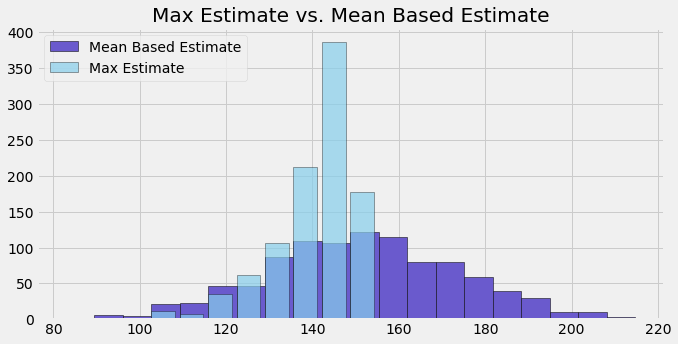

In [31]:
plt.figure(figsize = (10,5))

n, max_bins, patches = plt.hist(estimates['mean_based_estimate'], bins = 20, 
                                color = 'slateblue', ec = 'black', label = 'Mean Based Estimate')
n, bins, patches = plt.hist(estimates['max_estimate'], bins = max_bins, width = 5.5, ec = 'k',
                            color = 'skyblue', alpha = 0.7, label = 'Max Estimate')
plt.legend(loc='upper left')
plt.title('Max Estimate vs. Mean Based Estimate')

### Part 7 

Observations...

- The two ways of estimating N give more different results as the values in the random observations array increase. This is because the maximum number that the array can generate is 150. The max_estimate method can only produce a number as big as 150. On the other hand, the mean_based_estimate approach takes the mean of the observations array and multiplies it by 2; if the mean of the observations trends high, that mean that the mean_based_estimate can also be very high (suppose that all the observed serial numbers are 150, then the mean is 150, and the mean_based_estimate could be as high as 300). 